NEUTRINO SOURCE CANDIDATES WITHIN 5.0 DEGREES OF: RA 301.0 DEC 35.0
BETWEEN 2004-07-10 12:00:00.000 AND 2004-07-20 13:00:00.000

GAMMA RAY BURSTS:
Name                  RA      DEC  Time                       Error
---------------  -------  -------  -----------------------  -------
Integral 1853,1  301.926  35.5196  2004-07-18 21:19:01.200    -3.08
Integral 1853,0  301.926  35.5196  2004-07-18 21:19:01.200     3.08
Integral 1852,0  301.847  35.5264  2004-07-18 21:15:41.200     3.02
Integral 1851,0  301.906  35.5444  2004-07-18 21:11:01.200     3.22
Integral 1850,1  301.817  35.5479  2004-07-18 21:09:01.200    -3.25
Integral 1850,0  301.817  35.5479  2004-07-18 21:09:01.200     3.25
Integral 1849,1  301.885  35.5149  2004-07-18 20:58:21.200    -3.12
Integral 1849,0  301.885  35.5149  2004-07-18 20:58:21.200     3.12
Integral 1848,1  301.833  35.5315  2004-07-18 20:48:21.200    -3.02
Integral 1848,0  301.833  35.5315  2004-07-18 20:48:21.200     3.02
Integral 1847,1  301.879  35.5012  20

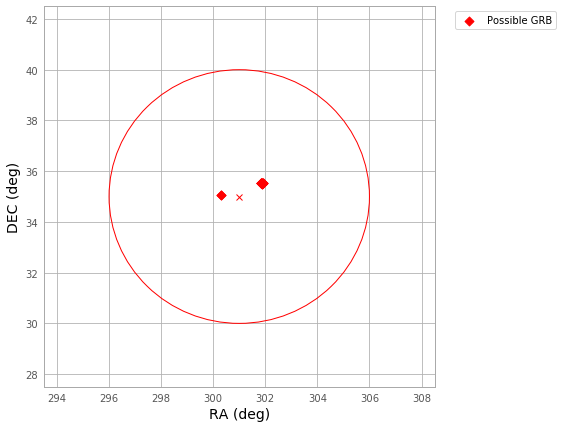

In [1]:
#!/usr/bin/python
import argparse

# For running in ipython notebook (comment out otherwise):
# %matplotlib inline

# This part not needed if running from ipython notebook
# When using ipython notebook, set RA, DEC, ERR manually

# We want the user to input the neutrino event's RA, DEC, and the radius of its error circle:

parser = argparse.ArgumentParser()
parser.add_argument('-r', '--RA', type = float, dest = 'RA', help = 'enter right ascension in degrees')
parser.add_argument('-d', '--DEC', type = float, dest = 'DEC', help = 'enter declination in degrees')
parser.add_argument('-e', '--ERR', type = float, dest = 'ERR', help = 'enter radius of the error circle in degrees')
parser.add_argument('-t', '--start', type = str, dest = 'start', help = "start time of event, format 'YYYY-MM-DD" \
                    + "HH:MM:SS.SSS...'")
parser.add_argument('-s', '--stop', type = str, dest = 'stop', help = "end time of event, format 'YYYY-MM-DD" \
                    + "HH:MM:SS.SSS...'")
parser.add_argument('-c', '--cats', type = str, dest = 'catalogs', nargs = '+', help = \
                    'Manually include the catalogs of your choice.' \
                    + ' Choices include: "3FGL", "2FHL", "2FAV", "TeGeV",' \
                    + '"ROSAT", "XMM", "NBG" (nearby galaxies), "FAVA", "GCN", and "SNe"')

arg1 = parser.parse_args(['-r', '301'])
arg2 = parser.parse_args(['-d', '35'])
arg3 = parser.parse_args(['-e', '5.0'])
arg4 = parser.parse_args(['-t', '2004-07-10 12:00:00'])
arg5 = parser.parse_args(['-s', '2004-07-20 13:00:00'])
arg6 = parser.parse_args(['-c', 'GRB'])

import sys

#Limit acceptable values of RA and DEC. 

if not(0.0 <= arg1.RA <= 360.0):
    print('Error: Right Ascension should be between 0 and 360 degrees')
    sys.exit()
    
if not(-90.0 <= arg2.DEC <= 90.0):
    print('Error: Declination should be between -90 and 90 degrees')
    sys.exit()

if not(0.0 <= arg3.ERR <= 90.0):
    print('Error: Error circle radius should be between 0 and 90 degrees')
    sys.exit()

# Variables are easier to work with without the 'args.'

RA = arg1.RA
DEC = arg2.DEC
ERR = arg3.ERR
start = arg4.start
stop = arg5.stop
catalogs = arg6.catalogs

# if (args.catalogs != None):
#     catalogs = args.catalogs
# else:
#     catalogs = ['3FGL', '2FHL', '2FAV', 'TeGeV', 'ROSAT', 'XMM', 'NBG', 'FAVA', 'GCN', 'SNe']
    
    
from astropy.time import Time

start = Time(start, format = 'iso', scale = 'utc')
stop = Time(stop, format = 'iso', scale = 'utc')

if(start > stop):
    print("Error: Event's end time should be after its start time.")
    sys.exit()

######################################

RA1 = RA - 1.5 * ERR
RA2 = RA + 1.5 * ERR
DEC1 = DEC - 1.5 * ERR
DEC2 = DEC + 1.5 * ERR

######################################

pltRA, pltDEC, srctype, pltflux, labels = [], [], [], [], []

check = False

for i in catalogs:
    if(i == '3FGL'):
        import readfits
        names3FGL, RAs3FGL, DECs3FGL, eflux3FGL, pflux3FGL, srctype3FGL, rshift3FGL, pltRA, pltDEC, srctype, pltflux, labels =\
        readfits.readfits('https://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/gll_psc_v16.fit', \
                          './3FGLCat.fit', RA, DEC, ERR, RA1, RA2, DEC1, DEC2, '3FGL', pltRA, pltDEC, srctype, pltflux, labels)
        check = True
        
if(check == False):
    names3FGL, RAs3FGL, DECs3FGL, eflux3FGL, pflux3FGL, srctype3FGL, rshift3FGL = [], [], [], [], [], [], []
else:
    check = False
    
for i in catalogs:
    if(i == '2FHL'):
        import readfits
        names2FHL, RAs2FHL, DECs2FHL, eflux2FHL, pflux2FHL, srctype2FHL, rshift2FHL, pltRA, pltDEC, srctype, pltflux, labels =\
        readfits.readfits('https://fermi.gsfc.nasa.gov/ssc/data/access/lat/2FHL/gll_psch_v09.fit', './2FHLCat.fit', \
                          RA, DEC, ERR, RA1, RA2, DEC1, DEC2, '2FHL', pltRA, pltDEC, srctype, pltflux, labels)
        check = True
        
if(check == False):
    names2FHL, RAs2FHL, DECs2FHL, eflux2FHL, pflux2FHL, srctype2FHL, rshift2FHL = [], [], [], [], [], [], []
else:
    check = False
    
for i in catalogs:
    if(i == '2FAV'):
        import readfits
        names2FAV, RAs2FAV, DECs2FAV, eflux2FAV, pflux2FAV, srctype2FAV, rshift2FAV, pltRA, pltDEC, srctype, pltflux, labels =\
        readfits.readfits('https://fermi.gsfc.nasa.gov/ssc/data/access/lat/fava_catalog/2fav_v09.fits', './2FAV.fits', \
                          RA, DEC, ERR, RA1, RA2, DEC1, DEC2, '2FAV', pltRA, pltDEC, srctype, pltflux, labels)
        check = True
        
if(check == False):
    names2FAV, RAs2FAV, DECs2FAV, eflux2FAV, pflux2FAV, srctype2FAV, rshift2FAV = [], [], [], [], [], [], []
else:
    check = False
    
for i in catalogs:
    if(i == 'ROSAT'):
        import readfits
        namesRX, RAsRX, DECsRX, efluxRX, pfluxRX, srctypeRX, rshiftRX, pltRA, pltDEC, srctype, pltflux, labels = \
        readfits.readfits('nope', './ROSAT.fits', RA, DEC, ERR, RA1, RA2, DEC1, DEC2, 'ROSAT', pltRA, pltDEC, srctype, \
                          pltflux, labels)
        check = True
        
if(check == False):
    namesRX, RAsRX, DECsRX, efluxRX, pfluxRX, srctypeRX, rshiftRX = [], [], [], [], [], [], []
else:
    check = False        
for i in catalogs:
    if(i == 'XMM'):
        import readfits
        namesXMM, RAsXMM, DECsXMM, efluxXMM, pfluxXMM, srctypeXMM, rshiftXMM, pltRA, pltDEC, srctype, pltflux, labels = \
        readfits.readfits('nope', './CAIXA_XMM.fits', RA, DEC, ERR, RA1, RA2, DEC1, DEC2, 'XMM', pltRA, pltDEC, srctype,\
                          pltflux, labels)
        check = True
        
if(check == False):
    namesXMM, RAsXMM, DECsXMM, efluxXMM, pfluxXMM, srctypeXMM, rshiftXMM = [], [], [], [], [], [], []
else:
    check = False
for i in catalogs:
    if(i == 'NBG'):
        import readfits
        namesNBG, RAsNBG, DECsNBG, bmagNBG, distNBG, galtypeNBG = \
        readfits.readfits('nope', './neargalcat.fits', RA, DEC, ERR, RA1, RA2, DEC1, DEC2, 'neargalcat', pltRA, pltDEC,\
                          srctype, pltflux, labels)
        check = True
        
if(check == False):
    namesNBG, RAsNBG, DECsNBG, bmagNBG, distNBG, galtypeNBG = [], [], [], [], [], []
else:
    check = False
for i in catalogs:
    if(i == 'TeGeV'):
        import readTeGeV
        namesTeGeV, RAsTeGeV, DECsTeGeV, efluxTeGeV, pfluxTeGeV, srctypeTeGeV, rshiftTeGeV, pltRA, pltDEC, srctype, \
        pltflux, labels = readTeGeV.readTeGeV('TeGeVCat.dat', RA, DEC, ERR, RA1, RA2, DEC1, DEC2, pltRA, pltDEC, srctype,\
                                              pltflux, labels)
        check = True
        
if(check == False):
    namesTeGeV, RAsTeGeV, DECsTeGeV, efluxTeGeV, pfluxTeGeV, srctypeTeGeV, rshiftTeGeV = [], [], [], [], [], [], []
else:
    check = False
    
for i in catalogs:
    if(i == 'FAVA'):
        import readFAVA
        namesFAVA, RAsFAVA, DECsFAVA, srctypeFAVA, t1FAVA, t2FAVA, lefluxFAVA, hefluxFAVA = \
        readFAVA.readFAVA(RA, DEC, ERR, start, stop, RA1, RA2, DEC1, DEC2)
        check = True
        
if(check == False):
    namesFAVA, RAsFAVA, DECsFAVA, srctypeFAVA, t1FAVA, t2FAVA, lefluxFAVA, hefluxFAVA = [], [], [], [], [], [], [], []
else:
    check = False
    
for i in catalogs:
    if(i == 'GRB'):
        import readGCN
        import numpy as np
        
        triggerNSwift, burstTimeSwift, RAsSwift, DECsSwift, ErrorSwift = readGCN.readGCN(RA, DEC, ERR, RA1, RA2, start, stop, 'Swift')
        triggerNFermi, burstTimeFermi, RAsFermi, DECsFermi, ErrorFermi = readGCN.readGCN(RA, DEC, ERR, RA1, RA2, start, stop, 'Fermi')
        triggerNIntegral, burstTimeIntegral, RAsIntegral, DECsIntegral, ErrorIntegral = readGCN.readGCN(RA, DEC, ERR, RA1, RA2, start, stop, 'Integral')
        triggerNMAXI, burstTimeMAXI, RAsMAXI, DECsMAXI, ErrorMAXI = readGCN.readGCN(RA, DEC, ERR, RA1, RA2, start, stop, 'MAXI')
        
        triggerNGRB = np.append(triggerNSwift, triggerNFermi)
        triggerNGRB = np.append(triggerNGRB, triggerNIntegral)
        triggerNGRB = np.append(triggerNGRB, triggerNMAXI)
        
        RAsGRB = np.append(RAsSwift, RAsFermi)
        RAsGRB = np.append(RAsGRB, RAsIntegral)
        RAsGRB = np.append(RAsGRB, RAsMAXI)
        
        DECsGRB = np.append(DECsSwift, DECsFermi)
        DECsGRB = np.append(DECsGRB, DECsIntegral)
        DECsGRB = np.append(DECsGRB, DECsMAXI)
        
        ErrorGRB = np.append(ErrorSwift, ErrorFermi)
        ErrorGRB = np.append(ErrorGRB, ErrorIntegral)
        ErrorGRB = np.append(ErrorGRB, ErrorMAXI)
        
        burstTimeGRB = np.append(burstTimeSwift, burstTimeFermi)
        burstTimeGRB = np.append(burstTimeGRB, burstTimeIntegral)
        burstTimeGRB = np.append(burstTimeGRB, burstTimeMAXI)
        
        check = True
if(check == False):
    triggerNGRB, burstTimeGRB, RAsGRB, DECsGRB, ErrorGRB = [], [], [], [], []
else:
    check = False

import printout

printout.printout(RA, DEC, ERR, start, stop, names3FGL, RAs3FGL, DECs3FGL, eflux3FGL, pflux3FGL, srctype3FGL, rshift3FGL, \
                  names2FHL, RAs2FHL, DECs2FHL, eflux2FHL, pflux2FHL, srctype2FHL, rshift2FHL, names2FAV, RAs2FAV, DECs2FAV, \
                  eflux2FAV, pflux2FAV, srctype2FAV, rshift2FAV, namesRX, RAsRX, DECsRX, efluxRX, pfluxRX, srctypeRX, \
                  rshiftRX, namesXMM, RAsXMM, DECsXMM, efluxXMM, pfluxXMM, srctypeXMM, rshiftXMM, namesTeGeV, RAsTeGeV, \
                  DECsTeGeV, efluxTeGeV, pfluxTeGeV, srctypeTeGeV, rshiftTeGeV, namesFAVA, RAsFAVA, DECsFAVA, srctypeFAVA, \
                  t1FAVA, t2FAVA, lefluxFAVA, hefluxFAVA, namesNBG, RAsNBG, DECsNBG, bmagNBG, distNBG, galtypeNBG, triggerNGRB, \
                  RAsGRB, DECsGRB, burstTimeGRB, ErrorGRB)

from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)
%matplotlib inline

import ploterrcirc        
        
ploterrcirc.ploterrcirc(RA, DEC, ERR, RA1, RA2, DEC1, DEC2)

import plotsrcs

plotsrcs.plotsrcs(pltRA, pltDEC, srctype, pltflux, labels, RAsNBG, DECsNBG, bmagNBG, RAsFAVA, DECsFAVA, RAsGRB, DECsGRB)